# Estimating stellar and planetary parameters based on visual inspection

This exercise was adapted into a Jupyter Notebook from the exercise from Sagan Summer Exoplanet Workshop 2017, made by Jennifer Yee. See Tuesday's hands-on materials and accompanying worksheet available here: [**link**](https://nexsci.caltech.edu/workshop/2017/handson.shtml)

We will analyze one of the simplest cases of a microlensing event with a planetary anomaly, which was described in [**Gould & Loeb, 1992**](https://ui.adsabs.harvard.edu/abs/1992ApJ...396..104G/abstract).

We make a couple of assumptions here. We are trying to analyze a Gould & Loeb planetary event with a caustic crossing perturbation. In such an event, we assume that there is **no parallax** and **no blending**.

## Load packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

## Load the data and display the event

In [29]:
# There should be a "randomized" microlensing event here
# to make it simple I will load an old event from SAGAN workshop
data = np.loadtxt('data/WFIRST_binary_SAGAN.dat')

Go ahead and zoom in at the features of the event.

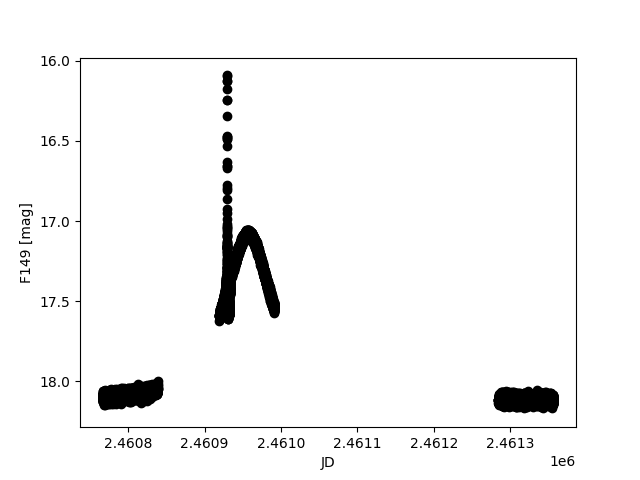

In [16]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('F149 [mag]');

## Parameters of the stellar event

First, we will determine the parameters of the stellar events, ignoring the planetary anomaly.

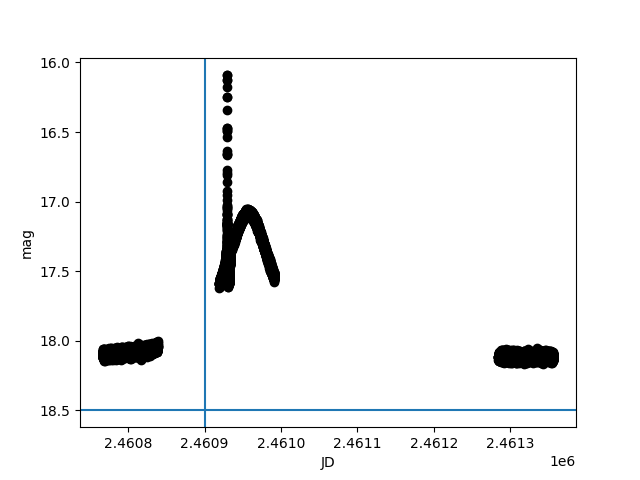

In [17]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use the vertical and horizontal lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axhline(y=18.5);

We have to determine several parameters: 
- t_0 is the time of the peak of the main event,
- mag_0 is the magnitude of the event at baseline,
- delta_mag_max is the amplitude between the baseline and the main event's peak,
- A_max is the amplification at the peak of the main event,
- u_0 is the impact parameter at the peak of the main event.

Use the plot above to find those values. You can help yourself with the vertical and horizontal lines, by editing their positions.

In [18]:
# Time of the peak of the event
t_0 = 2460000.

# Baseline magnitude 
mag_0 = 19.0

# Change in magnitude
delta_mag_max = 0.

# Maximum magnification
A_max = 1.

# Impact parameter
u_0 = 1.

Now, we'd like to determine the Einstein timescale, t_E.

First, you have to find what the amplitude is when the amplification A is equal to 1.34. That is when the source is at the Einstein radius $\theta_E$. 

Once you found the amplitude delta_mag at $A=1.34$, you can use the plot above to find the time when this amplitude is reached. Then, you can subtract that value from the time of peak and get the Einstein timescale, t_E.

In [21]:
# Change in magnitude for A = 1.34
delta_mag = 0.
# Time at delta_mag
t = 2460000.
# Einstein timescale
t_E = np.abs(t_0 - t)

## Parameters of the planet

Now we will focus on the planetary anomaly. 

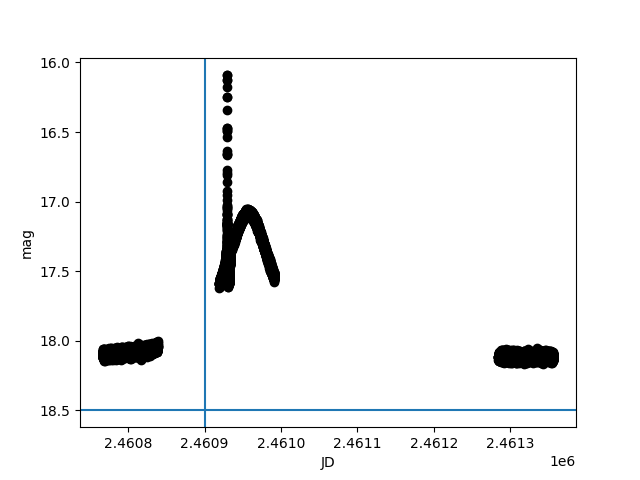

In [7]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use the vertical and horizontal lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axhline(y=18.5);

### Where is the planet?

First we have to find t_planet, the time when the planetary anomaly occurs. Use the plot above to determine that.

In [23]:
# Time of the planet perturbation
t_planet = 2460000.

Now, based on the information gained above we can find the position of the images.

In [26]:
# Time scaled to the Einsein timescale
tau = np.abs(t_planet - t_0) / t_E

# source-lens separation
u = np.sqrt(u_0**2 + tau**2)

# Position of the images
y_plus = 0.5 * np.sqrt(u**2 + 4.) + u
y_minus = 0.5 * np.sqrt(u**2 + 4.) - u

/tmp/ipykernel_15696/2619612462.py:2: RuntimeWarning: invalid value encountered in scalar divide
  tau = np.abs(t_planet - t_0) / t_E


### Find planet-star separation and the angle of the source trajectory

To find the planet-star separation, we have to determine whether minor or major images are perturbed. 

- Minor image perturbation occurs when there is a dip in the light curve during planetary anomaly.

![Minor image perturbation light curve](images/Yee_sagan_minor_pert.png "Plot from Jennifer Yee's presentation for this exercise.")

If minor image is perturbed: $s = y_-$.


- Major image perturbation occurs when there is a bump in the light curve during planetary anomaly.

![Major image perturbation light curve](images/Yee_sagan_major_pert.png "Plot from Jennifer Yee's presentation for this exercise.")

If major image is perturbed: $s = y_+$

⚠️ If your bump has a little dip that doesn't go back to the level of the main event, it would still be a major image perturbation rather than a minor image perturbation. The dip between two peaks can occur when the source is travelling inside the major image caustic.

In [51]:
# planet-star separation
s = 0.

Now we can find the value of the angle of the source trajectory, alpha, using values we determined earlier. Due to different geometric conventions, the correct value might be $\frac{\pi}{2}$ or $\pi$ away from the value you calculated.

In [30]:
# angle between trajectory and binary axis
alpha = np.atan(u_0 / tau)

### Find  source radius and planet-star mass ratio

Finding the planet-mass ratio and source radius depends on the event regime. First, you have to identify to which regime your event belongs. 

If your event has a minor image perturbation, move to the [**Minor**](####-Minor-image,-rho-<-caustic) section.

If your event has a major image perturbation, you have to determine whether the source radius is larger or smaller than the caustic.
- If there are two distinct peaks, move to the [**Major, $\rho$< caustic**](####-Major-image,-rho-<-caustic) section.
- If there are no dips and the peaks are merged, move to the [**Major, $\rho$> caustic**](####-Major-image,-rho->-caustic) section.

![Three reigmes](images/Yee_sagan_regimes.png "Figure from Jennifer Yee's presentation for Sagan Exoplanet Workshop")
This figure comes from Jennifer Yee's presentation for this exercise at Sagan Summer Exoplanet Workshop 2017.

#### Minor image, rho < caustic

In this case, there is a dip in your light curve. $\rho$ is smaller than the caustic.
We will follow [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
Look at Figure 2 from this paper. This is how the caustics look in your case.

![Minor image perturbation caustics](images/Han_2006_minor.png "Figure 2 from Han, 2006")

The minor image caustic is shaped like two triangles. 

You will have to now estimate the path of the source through the caustic(s). Use the alpha angle you determined earlier, as well as the features in the light curve. 
- How many caustic crossings are there? They manifest as sharp spikes in magnitude.
- Where is the dip? How long does it last?

First, we will find the source radius in Einstein radii. 
We have to estimate the duration of the caustic crossing feature in the light curve. 
If there's more than one, focus on one of them.

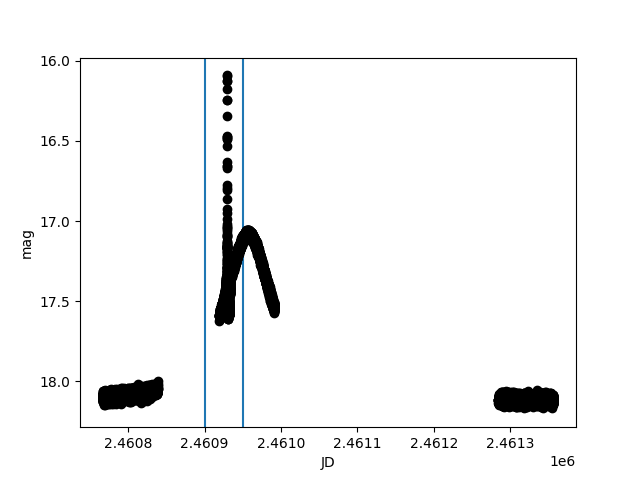

In [41]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axvline(x=2460950.);

In [34]:
# length of one caustic feature
delta_t_caustic = 0. # Time it takes the source to cross the caustic
t_star = delta_t_caustic / 2.

# Now we can determine rho
rho = t_star / t_E

/tmp/ipykernel_15696/3853100748.py:6: RuntimeWarning: invalid value encountered in scalar divide
  rho = t_star / t_E


Now we will find the planet-star mass ratio, q.

Have a look at the length of the dip in the light curve. It occurs when the source is travelling between the two caustic triangles. Based on the length of the feature and the alpha angle, you can find the caustic dimensions $\eta$ (eta) and $\xi$ (xi).

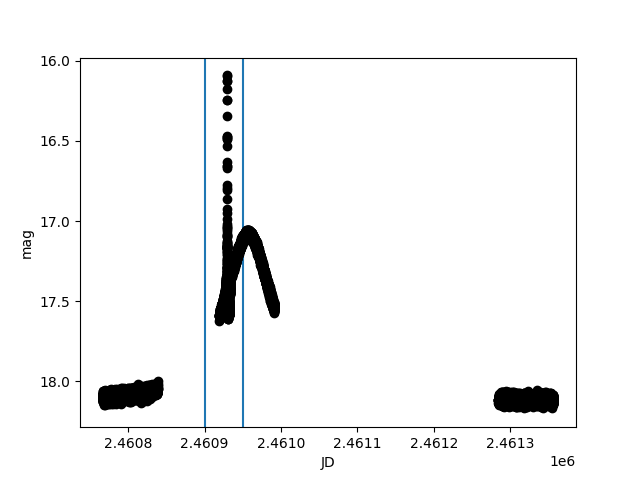

In [35]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axvline(x=2460950.);

In [39]:
# Length of the dip
delta_tau = 0.

# Does the source pass the whole distance between the triangle's longest edges without encountering another caustic?
# Put in here relevant equations based on the light curve features and equations below.




# Finally, mass ratio q is:
q = 0.

Handy equations for this part:
1. $\frac{\delta \eta_c}{2} \approx q^{1/2}s^3$ [1]
2. $\frac{\delta \xi_c}{2} \approx \frac{3\sqrt{3}}{4} q^{1/2}s^3$ [2]
3. $\eta_c \approx \frac{2 q^{1/2}}{s}(1 - \frac{1}{2}s^2)$ [3]

[1] Equation 13 from [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
[2] Equation 18 from [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
[3] Equation 14 from [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).

#### Major image, $\rho$ < caustic

In this case, there are distinct peaks in your light curve. $\rho$ is smaller than the caustic.
We will follow [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
Look at Figure 1 from this paper. This is how the caustic looks in your case.

![Major image perturbation caustic](images/Han_2006_major.png "Figure 1 from Han, 2006")

The major image caustic is shaped like a diamond. 

You will have to now estimate the path of the source through the caustic. Use the alpha angle you determined earlier, as well as the features in the light curve. 
- How many caustic crossings are there? They manifest as sharp spikes in magnitude.

First, we will find the source radius in Einstein radii. 
We have to estimate the duration of the caustic crossing feature in the light curve. 
If there's more than one, focus on one of them.

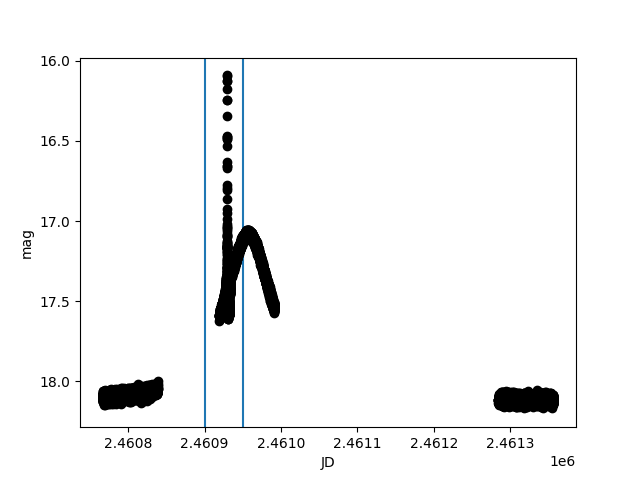

In [43]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axvline(x=2460950.);

In [44]:
# length of one caustic feature
delta_t_caustic = 0. # Time it takes the source to cross the caustic
t_star = delta_t_caustic / 2.

# Now we can determine rho
rho = t_star / t_E

/tmp/ipykernel_15696/3853100748.py:6: RuntimeWarning: invalid value encountered in scalar divide
  rho = t_star / t_E


Now we will find the planet-star mass ratio, q.

Have a look at the length between the caustic crossings in the light curve. It occurs when the source is travelling the inside of the diamond. Based on the length of the feature and the alpha angle, you can find the caustic dimensions $\eta$ (eta) and $\xi$ (xi).

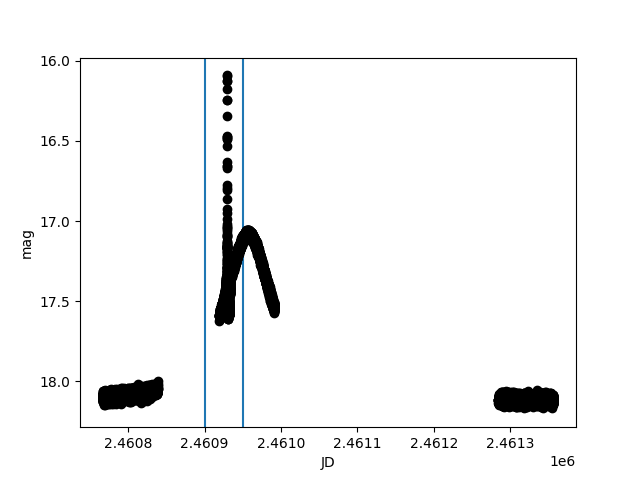

In [45]:
fig = plt.figure()
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], marker='o', color='black', ls='');
plt.gca().invert_yaxis();
plt.xlabel('JD');
plt.ylabel('mag');

## You can use vertical lines to find the values of the parameter
plt.axvline(x=2460900.);
plt.axvline(x=2460950.);

In [ ]:
# Length of the dip
delta_tau = 0.

# Does the source pass the whole distance between the diamond's vertices? 
# Or maybe only a part of that distance? Try to determine the fraction by eye.
# Put in here relevant equations based on the light curve features and equations below.




# Finally, mass ratio q is:
q = 0.

Handy equations for this part:
1. $\frac{\delta \eta_c}{2} \approx \frac{4q^{1/2}}{s^2}(1+\frac{1}{2s^2})$ [1]
2. $\frac{\delta \xi_c}{2} \approx \frac{4q^{1/2}}{s^2}(1-\frac{1}{2s^2})$ [2]

[1] Equation 8 from [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).
[2] Equation 9 from [**Han, 2006**](https://ui.adsabs.harvard.edu/abs/2006ApJ...638.1080H/abstract).

#### Major image, $\rho$ > caustic

In this case, the peaks are merged in your light curve, and there are no dips. $\rho$ is larger than the caustic.
We will follow [**Gould & Gaucherel, 1997**](https://ui.adsabs.harvard.edu/abs/1997ApJ...477..580G/abstract).
Look at Figure 1 from this paper. This is how the caustic looks in your case.

![Major image perturbation caustic](images/Gould_Gaucherel_1997.png "Figure 1 from Gould & Gaucherel, 1997")

The major image caustic is shaped like a diamond, but the source is large compared to it, and caustic entry and exit peaks merge.

You will have to now estimate the change in the magnitude for the caustic, delta_mag_c. This is the "height" of the bump in the light curve in magnitudes. You count the "height" from the main event light curve.

In [47]:
# Change in the magnitude for the caustic
delta_mag_c = 0.

Based on delta_mag_c you can now find the amplification during the planetary anomaly, A_p.

In [49]:
# Insert the formula for magnification
A_p = 0.

Finally, we can use this equation from [**Gould & Gaucherel, 1997**](https://ui.adsabs.harvard.edu/abs/1997ApJ...477..580G/abstract) to determine the mass ratio q:

$A_p = \frac{2q}{\rho^2}$ [1]

[1] Equation xx from [**Gould & Gaucherel, 1997**](https://ui.adsabs.harvard.edu/abs/1997ApJ...477..580G/abstract).

In [50]:
# Insert formula for mass ratio q
q = 0.

## Summary

Let's display all the found parameters. We will show some of them in logarithmic form since this is a notation you can encounter in many papers.

Some of parameters, such as Einstein timescale $t_E$, source radius $\rho$, separation $s$ and mass ratio $q$ are easier to probe in log space, so have that in mind when you'll be tackling some of the events in the future.

In [58]:
params = [t_0, u_0, t_E, rho, s, q, alpha]
params_labels = ['t_0', 'u_0', 't_E',
                 'rho', 's', 'q', 'alpha']
log_params = [t_0, u_0, np.log10(t_E), np.log10(rho), np.log10(s), np.log10(q), alpha]
log_params_labels = ['t_0', 'u_0', 'log_{10}(t_E)',
                     'log_{10}(rho)', 'log_{10}(s)', 'log_{10}(q)', 'alpha']


print('Your event parameters:')
for i in range(len(params)):
    print('%s = %.3f'%(params_labels[i], params[i]))

print('\nYour event parameters (log-space):')
for i in range(len(params)):
    print('%s = %.3f'%(log_params_labels[i], log_params[i]))

Your event parameters:
t_0 = 2460000.000
u_0 = 1.000
t_E = 0.000
rho = nan
s = 0.000
q = 0.000
alpha = nan

Your event parameters (log-space):
t_0 = 2460000.000
u_0 = 1.000
log_{10}(t_E) = -inf
log_{10}(rho) = nan
log_{10}(s) = -inf
log_{10}(q) = -inf
alpha = nan


/tmp/ipykernel_15696/1412547566.py:4: RuntimeWarning: divide by zero encountered in log10
  log_params = [t_0, u_0, np.log10(t_E), np.log10(rho), np.log10(s), np.log10(q), alpha]


## Handy equations

### 1. Magnitude and amplification 

$m_1 - m_2 = -2.5 log_{10}(\frac{f_1}{f_2}) \approx -2.5 log_{10}(A)$

### 2. Amplification and impact parameter

$A = \frac{u^2 + 2}{u\sqrt{u^2 + 4}} \approx \frac{1}{u}$

Approximation assumes $u << 1$.

### 3. Impact parameter at any given time

$u = \sqrt{(\frac{t-t_0}{t_E})^2 + u_0^2}$